## CAISO April Net Load Trends

We will be using the gridstatusio API client for data fetching, and Plotly for data visualization. You can register for a Grid Status api key here: https://www.gridstatus.io/api

In [1]:
import gridstatusio
import plotly.graph_objects as go
import pandas as pd

gridstatusio.__version__

'0.3.0'

## Initialize the gridstatusio client

We instantiate the GridStatusClient, which we will use to fetch our data.

In [2]:
# make sure to set up API Key in environment variable
# or pass it in as a string
client = gridstatusio.GridStatusClient()

## Get data

Fetch data using the GridStatusClient. We will get the 'caiso_standardized_5_min' dataset from the beginning of the data to the most recent data.

In [3]:
df = client.get_dataset(
    dataset="caiso_standardized_5_min",
    start=None,  # start from beginning of data
    end=None,  # end at most recent data
    tz="US/Pacific",  # return time stamps in Pacific time
)

Fetching Page 1...Done in 1.87 seconds. 
Fetching Page 2...Done in 2.48 seconds. Total time: 4.35s. Avg per page: 2.17s
Fetching Page 3...Done in 3.03 seconds. Total time: 7.38s. Avg per page: 2.46s
Fetching Page 4...Done in 2.07 seconds. Total time: 9.45s. Avg per page: 2.36s
Fetching Page 5...Done in 1.99 seconds. Total time: 11.44s. Avg per page: 2.29s
Fetching Page 6...Done in 2.45 seconds. Total time: 13.89s. Avg per page: 2.31s
Fetching Page 7...Done in 2.95 seconds. Total time: 16.84s. Avg per page: 2.41s
Fetching Page 8...Done in 2.1 seconds. Total time: 18.94s. Avg per page: 2.37s
Fetching Page 9...Done in 2.47 seconds. Total time: 21.4s. Avg per page: 2.38s
Fetching Page 10...Done in 1.92 seconds. Total time: 23.33s. Avg per page: 2.33s
Fetching Page 11...Done in 1.88 seconds. Total time: 25.2s. Avg per page: 2.29s
Fetching Page 12...Done in 3.13 seconds. Total time: 28.34s. Avg per page: 2.36s
Fetching Page 13...Done in 2.17 seconds. Total time: 30.5s. Avg per page: 2.35s
Fe

In [4]:
df

,interval_start_local,interval_end_local,net_load,renewables,renewables_to_load_ratio,primary_power_source,load.load,load_forecast.forecast_time_local,load_forecast.load_forecast,fuel_mix.solar,...,fuel_mix.coal,fuel_mix.nuclear,fuel_mix.natural_gas,fuel_mix.large_hydro,fuel_mix.batteries,fuel_mix.imports,fuel_mix.other,storage.supply,storage.stand_alone_batteries,storage.hybrid_batteries
0,2018-07-27 10:50:00-07:00,2018-07-27 10:55:00-07:00,23661.0,14851.0,0.434761,natural_gas,34159.0,2018-07-12 00:00:00-07:00,36071.206667,9585.0,...,21.0,2274.0,11323.0,2437.0,-9.0,6027.0,0.0,NaN,NaN,NaN
1,2018-07-27 10:55:00-07:00,2018-07-27 11:00:00-07:00,23735.0,14894.0,0.434646,natural_gas,34267.0,2018-07-12 00:00:00-07:00,36232.023333,9625.0,...,21.0,2274.0,11345.0,2459.0,-10.0,6063.0,0.0,NaN,NaN,NaN
2,2018-07-27 11:00:00-07:00,2018-07-27 11:05:00-07:00,23797.0,14924.0,0.434456,natural_gas,34351.0,2018-07-12 00:00:00-07:00,36392.840000,9663.0,...,21.0,2273.0,11460.0,2468.0,-11.0,6010.0,0.0,NaN,NaN,NaN
3,2018-07-27 11:05:00-07:00,2018-07-27 11:10:00-07:00,23961.0,14887.0,0.430845,natural_gas,34553.0,2018-07-12 00:00:00-07:00,36541.468333,9726.0,...,21.0,2274.0,11628.0,2383.0,-18.0,6042.0,0.0,NaN,NaN,NaN
4,2018-07-27 11:10:00-07:00,2018-07-27 11:15:00-07:00,24082.0,14842.0,0.427662,natural_gas,34705.0,2018-07-12 00:00:00-07:00,36690.096667,9791.0,...,20.0,2273.0,11573.0,2284.0,-18.0,6307.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526173,2023-07-28 10:40:00-07:00,2023-07-28 10:45:00-07:00,NaN,NaN,NaN,NaN,NaN,2023-07-05 00:00:00-07:00,29202.100000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526174,2023-07-28 10:45:00-07:00,2023-07-28 10:50:00-07:00,NaN,NaN,NaN,NaN,NaN,2023-07-05 00:00:00-07:00,29202.100000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526175,2023-07-28 10:50:00-07:00,2023-07-28 10:55:00-07:00,NaN,NaN,NaN,NaN,NaN,2023-07-05 00:00:00-07:00,29202.100000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526176,2023-07-28 10:55:00-07:00,2023-07-28 11:00:00-07:00,NaN,NaN,NaN,NaN,NaN,2023-07-05 00:00:00-07:00,29202.100000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing data

Extract the data for the month of April and create additional columns for year and time. Then, calculate the average net load for each year and time combination.

In [5]:
apr_data = df[df["interval_start_local"].dt.month == 4].copy()

apr_data["year"] = apr_data["interval_start_local"].dt.year
apr_data["hh:mm"] = apr_data["interval_start_local"].dt.strftime("%H:%M")

net_load_apr_avg = (
    apr_data.groupby(["year", "hh:mm"])[["net_load"]].mean().reset_index()
)

# append 24:00 so tick shows up on plot
net_load_apr_avg = pd.concat(
    [net_load_apr_avg, pd.DataFrame({"year": 2023, "hh:mm": ["24:00"]})]
)

net_load_apr_avg

,year,hh:mm,net_load
0,2019,00:00,18721.333333
1,2019,00:05,18630.700000
2,2019,00:10,18570.566667
3,2019,00:15,18481.600000
4,2019,00:20,18380.400000
...,...,...,...
1436,2023,23:40,18784.233333
1437,2023,23:45,18678.633333
1438,2023,23:50,18567.866667
1439,2023,23:55,18472.607143


## Preprocessing data for minimum net load day in 2023

Extract the data for 2023 and find the day with the minimum net load.

In [6]:
apr_2023 = apr_data[apr_data["year"] == 2023]

# get time min load occurred in 2033
min_net_load_time = apr_2023.loc[apr_2023["net_load"].idxmin(), "interval_start_local"]

# select data for only that day
min_net_load_day_2023 = apr_2023[
    apr_2023["interval_start_local"].dt.date == min_net_load_time.date()
]
min_net_load_day_2023[["interval_start_local", "hh:mm", "net_load"]]

,interval_start_local,hh:mm,net_load
498397,2023-04-23 00:00:00-07:00,00:00,17487.0
498398,2023-04-23 00:05:00-07:00,00:05,17590.0
498399,2023-04-23 00:10:00-07:00,00:10,17558.0
498400,2023-04-23 00:15:00-07:00,00:15,17402.0
498401,2023-04-23 00:20:00-07:00,00:20,17285.0
...,...,...,...
498680,2023-04-23 23:35:00-07:00,23:35,16612.0
498681,2023-04-23 23:40:00-07:00,23:40,16423.0
498682,2023-04-23 23:45:00-07:00,23:45,16266.0
498683,2023-04-23 23:50:00-07:00,23:50,16137.0


## Plotting data with Plotly

Here we create an interactive plot using Plotly. We plot net load over time for each year, with different colors for different years, and also add a special line for the day in 2023 with the minimum net load.

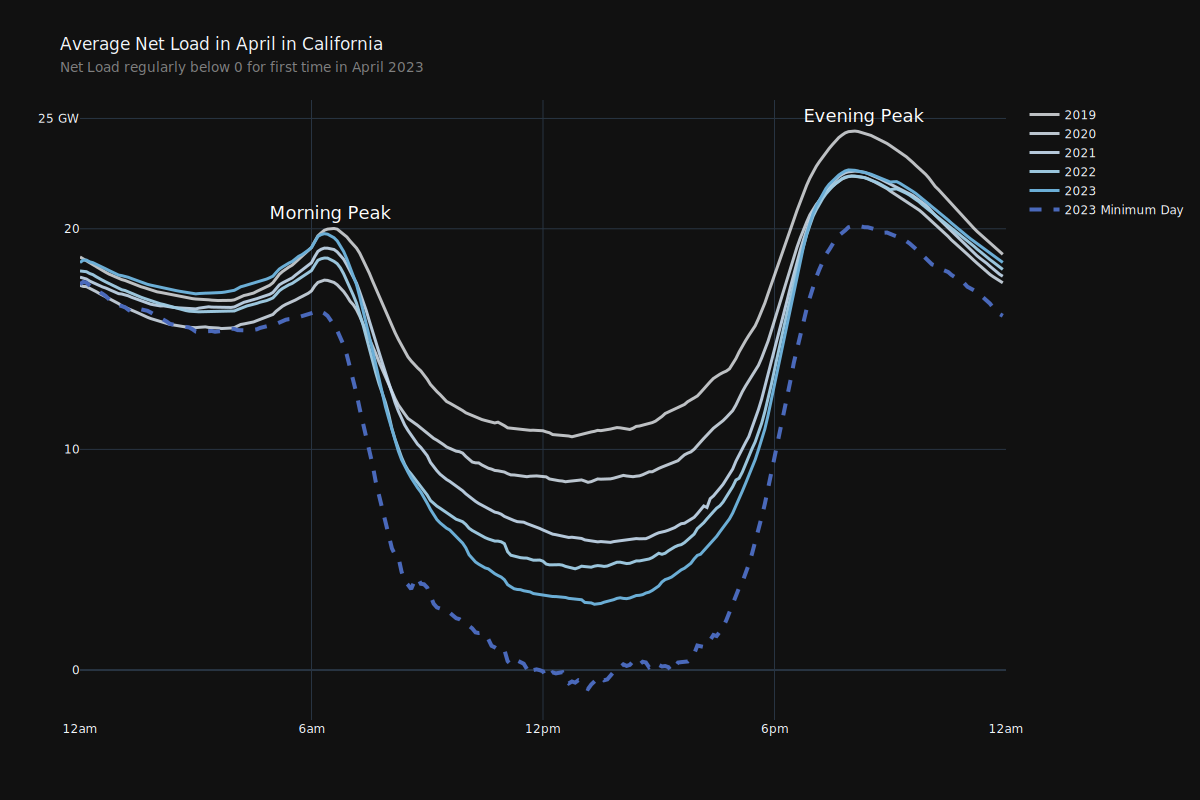

In [7]:
# Import plotly libraries
import plotly.graph_objects as go
import plotly.express as px

# Define figure
fig = go.Figure()

# Get unique years and define color gradient
unique_years = net_load_apr_avg["year"].unique()
blues = px.colors.sequential.Blues[: len(unique_years)]

# Add line traces for net_load per year
for year, color in zip(unique_years, blues):
    # Filter net load data for the current year
    year_data = net_load_apr_avg[net_load_apr_avg["year"] == year]

    fig.add_trace(
        go.Scatter(
            x=year_data["hh:mm"],
            y=year_data["net_load"] / 1000,
            mode="lines",
            name=str(year),
            line=dict(color=color, width=3),
            opacity=min(0.6 + (year - 2017) * 0.075, 1),
        )
    )

# Add trace for minimum net_load_day in 2023
fig.add_trace(
    go.Scatter(
        x=min_net_load_day_2023["hh:mm"],
        y=min_net_load_day_2023["net_load"] / 1000,
        mode="lines",
        name="2023 Minimum Day",
        line=dict(color="#4a69bb", width=4, dash="dash"),
        opacity=1,
    )
)

# Define axis tick values
x_tick_values = ["00:00", "06:00", "12:00", "18:00", "24:00"]
y_tick_values = [0, 10, 20, 25]

# Update layout with title, subtitle, and custom axis tick labels
fig.update_layout(
    title="Average Net Load in April in California<br><span style='font-size:0.8em;color:gray'>Net Load regularly below 0 for first time in April 2023 </span>",
    xaxis=dict(
        tickmode="array",
        tickvals=x_tick_values,
        ticktext=["12am", "6am", "12pm", "6pm", "12am"],
    ),
    yaxis=dict(tickmode="array", tickvals=y_tick_values, ticktext=[0, 10, 20, "25 GW"]),
    template="plotly_dark",
)

# Define annotations
annotations = [
    {
        "x": "06:30",
        "text": "Morning Peak",
        "y_shift": 35,
        "time": "06:00",
        #  font size
        "font_size": 20,
    },
    {"x": "20:20", "text": "Evening Peak", "y_shift": 160, "time": "18:00"},
]

# Add annotations for morning and evening peaks
for annotation in annotations:
    fig.add_annotation(
        x=annotation["x"],
        y=net_load_apr_avg[net_load_apr_avg["hh:mm"] == annotation["time"]][
            "net_load"
        ].max()
        / 1000,
        text=annotation["text"],
        showarrow=False,
        yshift=annotation["y_shift"],
        font=dict(color="white", size=18),
    )

# interactive
# fig.show()
# Display the figure as svg
fig.show("svg", width=1200, height=800)

## Conclusion

We have now plotted the average net load in April in California over several years, highlighting the year 2023 which was the first time the net load regularly went below zero. This information is invaluable for understanding changes in energy consumption and generation patterns over time.